# **Setup**

In [143]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller 

# **Data Import**

In [144]:
data = pd.read_csv('AirPassengers.csv')

print(data.shape)
data.columns

(144, 2)


Index(['Month', '#Passengers'], dtype='object')

# **01 Stationarity**

## **Plot #01**

In [145]:
px.line(data,'Month','#Passengers',labels={'Month':'Months','#Passengers':'No. Of Passengers'})

## **Plot #02 - Difference Values**

In [146]:
data['#Passengers_Diff'] = data['#Passengers'].diff()

In [147]:
px.line(data,'Month','#Passengers_Diff',labels={'Month':'Months','#Passengers_Diff':'Difference In No. Of Passengers'})

In [148]:
# Mean Of Data Is Stabilized
# Variance Of Data Is Still Unstable

## **Plot #03 - Log Values**

In [149]:
data['#Passengers_Log'] = np.log(data['#Passengers'])

In [150]:
px.line(data,'Month','#Passengers_Log',labels={'Month':'Months','#Passengers_Log':'Log Of No. Of Passengers'})

In [151]:
# Variance is Stable
# Mean is Unstable

## **Plot #04 - Log & Diff Values**

In [152]:
data['PAX_Diff_Log'] = data['#Passengers_Log'].diff()

In [153]:
px.line(data,'Month','PAX_Diff_Log',labels={'Month':'Months','PAX_Diff_Log':'Log Of No. Of Passengers'})

## **Stationarity Test**

In [154]:
data['PAX_Diff_Log'][1:]

1      0.052186
2      0.112117
3     -0.022990
4     -0.064022
5      0.109484
         ...   
139   -0.026060
140   -0.176399
141   -0.097083
142   -0.167251
143    0.102279
Name: PAX_Diff_Log, Length: 143, dtype: float64

In [155]:
from statsmodels.tsa.stattools import adfuller 
test_results = adfuller(data['PAX_Diff_Log'][1:])
print(test_results)

(-2.7171305983881386, 0.07112054815085785, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -440.35846985568105)


In [156]:
print('ADF Statistics: ',test_results[0])
print('P_Value: ',test_results[1])

ADF Statistics:  -2.7171305983881386
P_Value:  0.07112054815085785


In [157]:
test_results[4]

{'1%': -3.4825006939887997,
 '5%': -2.884397984161377,
 '10%': -2.578960197753906}

In [158]:
test_results[4].items()

dict_items([('1%', -3.4825006939887997), ('5%', -2.884397984161377), ('10%', -2.578960197753906)])

In [159]:
print('Critical Values: ',)
for thres,adf_stat in test_results[4].items():
    print(thres,adf_stat)

Critical Values: 
1% -3.4825006939887997
5% -2.884397984161377
10% -2.578960197753906


In [160]:
print('Critical Values: ',)
pd.DataFrame.from_dict(test_results[4].items())

Critical Values: 


,0,1
0,1%,-3.482501
1,5%,-2.884398
2,10%,-2.578960


# **02 Box-Cox Transform**

In [161]:
from scipy.stats import boxcox 
data['Passengers_Box_Cox'], lam = boxcox(data['#Passengers'])

In [162]:
print('Lamda Value: ',lam)

Lamda Value:  0.14802265137037945


In [163]:
px.line(data,x='Month',y='Passengers_Box_Cox',labels={'Month':'Time','Passengers_Box_Cox':'Box Cox Tranform Values'})

# **03 Seasonality**

In [164]:
data['Passenger_Season_Diff'] = data['#Passengers'].diff(periods=12)

In [165]:
px.line(data,x='Month',y='Passenger_Season_Diff',labels={'Month':'Time','Passenger_Season_Diff':'Passengers Seasonal Difference'})

In [166]:
from cgi import test


test_results = adfuller(data['Passenger_Season_Diff'][12:])

print('ADF Statistics: ',test_results[0])
print('P Value: ',test_results[1])
print('Critical Values: ')
pd.DataFrame(test_results[4].items())

ADF Statistics:  -3.3830207264924805
P Value:  0.011551493085514982
Critical Values: 


,0,1
0,1%,-3.481682
1,5%,-2.884042
2,10%,-2.578770


# **04 Decomposition**

In [167]:
px.line(data,x='Month',y='#Passengers')

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose

## **Multiplicative Decomposition**

In [169]:
decomposition_plot_multi = seasonal_decompose(data['#Passengers'],model='multiplicative')
decomposition_plot_multi.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

## **Additive Decomposition**

In [170]:
data['Additive_Decomposition'], lam = boxcox(data['#Passengers'])

decomposition_plot_add = seasonal_decompose(data['Additive_Decomposition'],model='additive')
decomposition_plot_add.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

# **05 Auto-Correlation**

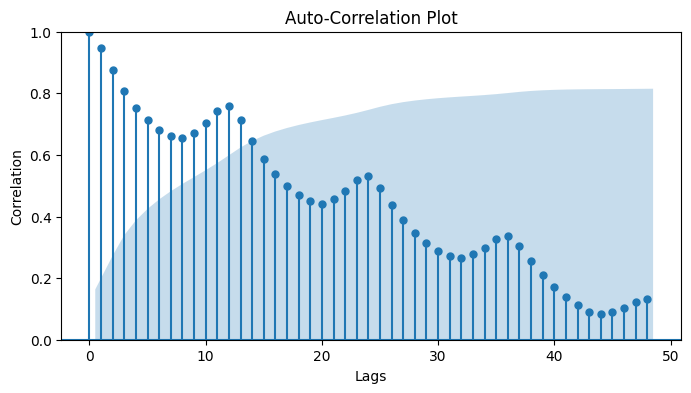

In [171]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rc('figure',figsize=(8,4))
plot_acf(data['#Passengers'],lags=48)
plt.ylim(0,1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Auto-Correlation Plot')
plt.show()

# **06 Partial Auto-Correlation**

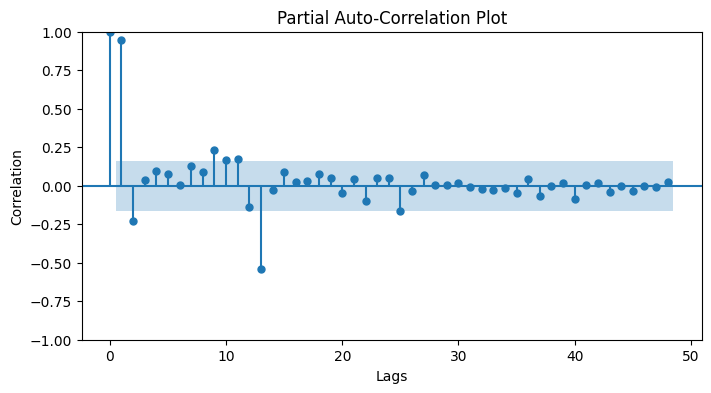

In [172]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.rc('figure',figsize=(8,4))
plot_pacf(data['#Passengers'],lags=48)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Partial Auto-Correlation Plot')
plt.show()

# **07 Forecasting Metrics**

* MAE: Mean Absolute Error
* MSE: Mean Square Error
* RMSE: Root Mean Square Error
* MAPE: Mean Absolute Percentage Error
* SMAPE: Symmertic Mean Absolute Percentage Error
* MSLE: Mean Square Logarithmic Error

# **08 Basic Forecasting Models**

* Average Model
* Naive Model
* Seasonal Naive Model
* Drift Model

In [180]:
data['Month'] = pd.to_datetime(data['Month'])

In [181]:
train = data.iloc[:-int(len(data)*0.2)]
test = data.iloc[-int(len(data)*0.2)]

In [182]:
print(data.index)
print(train.index)
print(test.index)

RangeIndex(start=0, stop=144, step=1)
RangeIndex(start=0, stop=116, step=1)
Index(['Month', '#Passengers', '#Passengers_Diff', '#Passengers_Log',
       'PAX_Diff_Log', 'Passengers_Box_Cox', 'Passenger_Season_Diff',
       'Additive_Decomposition', 'Month_DT'],
      dtype='object')


In [183]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecast, name='Test'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()

## **Average Model**

In [177]:
test['mean_forecast'] = train['#Passengers'].mean()

/var/folders/c0/06v83ym56nl05bjhdwr6hz9m0000gp/T/ipykernel_1486/70818180.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c0/06v83ym56nl05bjhdwr6hz9m0000gp/T/ipykernel_1486/70818180.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
import plotly.graph_objects as go 

fig = go.Figure()
fig.add_trace(go.Scatter(x=train['Month'],y=train['#Passengers'],name='Train'))
fig.add_trace(go.Scatter(x=test['Month'],y=test['mean_forecast'],name='Test'))
fig.show()

KeyError: 'mean_forecast'

In [185]:
# plot_func(test['mean_forecast'], 'Average Forecast')

## **Naive Model**

In [186]:
test['naive_forecast'] = train['#Passengers'].iloc[-1]

/var/folders/c0/06v83ym56nl05bjhdwr6hz9m0000gp/T/ipykernel_1486/649783769.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c0/06v83ym56nl05bjhdwr6hz9m0000gp/T/ipykernel_1486/649783769.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train['Month'],y=train['#Passengers'],name='Train'))
fig.add_trace(go.Scatter(x=test['Month'],y=test['naive_forecast'],name='Test'))
fig.show()

ValueError: 
    Invalid value of type 'pandas._libs.tslibs.timestamps.Timestamp' received for the 'x' property of scatter
        Received value: Timestamp('1958-09-01 00:00:00')

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

## **Seasonal Naive Forecasting**

In [188]:
train['month_number'] = pd.DatetimeIndex(train['Month']).month
test['month_number'] = pd.DatetimeIndex(test['Month']).month

/var/folders/c0/06v83ym56nl05bjhdwr6hz9m0000gp/T/ipykernel_1486/1619399574.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: DatetimeIndex(...) must be called with a collection of some kind, Timestamp('1958-09-01 00:00:00') was passed

# **09 Exponential Smoothing**

In [189]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing